In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("whitegrid")
# sns.set_context("paper", font_scale=1.4)
# sns.set_palette("Set1")
# current_palette = sns.color_palette()
# sns.palplot(current_palette)

def fasta_reader(file):
    '''Converts .fasta to a pandas dataframe with accession as index
    and sequence in a column 'sequence'
    '''
    fasta_df = pd.read_csv(file, sep='>', lineterminator='>', header=None)
    fasta_df[['Accession', 'Sequence']] = fasta_df[0].str.split('\n', 1, \
                                        expand=True)
    fasta_df['Accession'] = fasta_df['Accession']
    fasta_df['Sequence'] = fasta_df['Sequence'].replace('\n', '', regex=True).\
                            astype(str).str.upper().replace('U', 'T')
    total_seq = fasta_df.shape[0]
    fasta_df.drop(0, axis=1, inplace=True)
    fasta_df = fasta_df[fasta_df.Sequence != '']
    fasta_df = fasta_df[fasta_df.Sequence != 'NONE']
    final_df = fasta_df.dropna()
    remained_seq = final_df.shape[0]
    if total_seq != remained_seq:
        print("{} sequences were removed due to inconsistencies in"
                      "provided file.".format(total_seq-remained_seq))
    return final_df


CODON_TO_AA={'TTT':'F','TCT':'S','TAT':'Y','TGT':'C','TTC':'F','TCC':'S',\
             'TAC':'Y','TGC':'C','TTA':'L','TCA':'S','TAA':'stop',\
             'TGA':'stop','TTG':'L','TCG':'S','TAG':'stop','TGG':'W',\
             'CTT':'L','CCT':'P','CAT':'H','CGT':'R','CTC':'L','CCC':'P',\
             'CAC':'H','CGC':'R','CTA':'L','CCA':'P','CAA':'Q','CGA':'R',\
             'CTG':'L','CCG':'P','CAG':'Q','CGG':'R','ATT':'I','ACT':'T',\
             'AAT':'N','AGT':'S','ATC':'I','ACC':'T','AAC':'N','AGC':'S',\
             'ATA':'I','ACA':'T','AAA':'K','AGA':'R','ATG':'M','ACG':'T',\
             'AAG':'K','AGG':'R','GTT':'V','GCT':'A','GAT':'D','GGT':'G',\
             'GTC':'V','GCC':'A','GAC':'D','GGC':'G','GTA':'V','GCA':'A',\
             'GAA':'E','GGA':'G','GTG':'V','GCG':'A','GAG':'E','GGG':'G'}



def translate(seq):
    seq = seq[:-3]
    length = (len(seq)- len(seq)%3)
    split_func = lambda seq, n: [seq[i:i+n] for\
                                    i in range(0, length, n)]
    codons = split_func(seq, 3)
    aa = ''
    for c in codons:
        aa+=CODON_TO_AA[c]
    return aa

### Numbers of targets in the PSI:Biology pipeline and the number of structures solved. (Metrics items 1.1-1.8)



In [2]:
#Get table from target tarck database
tables = pd.read_html('http://targetdb.rcsb.org/metrics/ajax_table1.jsp')

In [3]:
tables[0]

,Center,Total,Cloned,Expressed,Purified,Structure Studies(X-ray/NMR/EM),In PDB,StructuresIn PDB
0,JCSG,9809,9758,8735,3323,2299 / 181 / 0,484,516
1,MCSG,8051,5991,2268,2103,1114 / 3 / 0,340,579
2,NESG,6696,4979,4166,1805,920 / 796 / 0,263,327
3,NYSGRC,25122,17996,4090,2902,1887 / 13 / 0,228,359
4,CSMP,168,147,124,26,17 / 0 / 0,1,5
5,GPCR,826,50,38,30,18 / 0 / 0,16,52
6,MPID,55,49,24,30,10 / 1 / 0,0,0
7,MPSBC,141,107,93,26,23 / 0 / 1,1,3
8,MPSbyNMR,14,14,14,12,0 / 11 / 0,3,8
9,NYCOMPS,5755,3134,1017,473,3 / 0 / 0,2,37


In [3]:
tables[0].to_pickle('data_used/target_track.pkl.gz')

In [2]:
tt = pd.read_pickle('data_used/target_track.pkl.gz')

In [3]:
tt

,Center,Total,Cloned,Expressed,Purified,Structure Studies(X-ray/NMR/EM),In PDB,StructuresIn PDB
0,JCSG,9809,9758,8735,3323,2299 / 181 / 0,484,516
1,MCSG,8051,5991,2268,2103,1114 / 3 / 0,340,579
2,NESG,6696,4979,4166,1805,920 / 796 / 0,263,327
3,NYSGRC,25122,17996,4090,2902,1887 / 13 / 0,228,359
4,CSMP,168,147,124,26,17 / 0 / 0,1,5
5,GPCR,826,50,38,30,18 / 0 / 0,16,52
6,MPID,55,49,24,30,10 / 1 / 0,0,0
7,MPSBC,141,107,93,26,23 / 0 / 1,1,3
8,MPSbyNMR,14,14,14,12,0 / 11 / 0,3,8
9,NYCOMPS,5755,3134,1017,473,3 / 0 / 0,2,37


In [4]:
tt['Total'].sum(), tt['Cloned'].sum(), tt['Expressed'].sum(), tt['Purified'].sum()

(57582, 42774, 21046, 10936)

In [8]:
#Not cloned and cloned
(5758200 -4277400)/57582, 4277400/57582

(25.716369698864227, 74.28363030113577)

In [12]:
#Not expressed and expressed
(4277400 -2104600)/57582, 2104600/57582

(37.73401410162898, 36.549616199506794)

In [18]:
#not purifeid and purified
(2104600 - 1093600)/57582, 1093600/57582, 21046 - 10936

(17.557570073981452, 18.992046125525338, 10110)

In [34]:
round(100-74.283630)

26

In [39]:
np.round(tt[['Total', 'Cloned', 'Expressed', 'Purified']].sum()*100/tt['Total'].sum())

Total        100.0
Cloned        74.0
Expressed     37.0
Purified      19.0
dtype: float64

In [44]:
tt[['Total', 'Cloned', 'Expressed', 'Purified']].sum()

Total        57582
Cloned       42774
Expressed    21046
Purified     10936
dtype: int64

In [48]:
21046 - 10936, 1011000/57582, 1093600/57582

(10110, 17.557570073981452, 18.992046125525338)

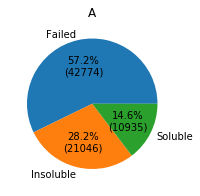

In [104]:
all_data = ['42774 Cloned', '21046 Expressed', '10936 Purified']

data = [float(x.split()[0]) for x in all_data]
ingredients = [x.split()[-1] for x in all_data]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"), labels=labels_)

# ax.legend(wedges, ingredients,
# #           title="Ingredients",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))

# plt.setp(autotexts, size=8, weight="bold")

ax.set_title("A")

plt.show()
# plt.savefig("figs/Status_of_protein_expression(1).pdf", bbox_inches = 'tight', pad_inches = 0)

In [23]:
#classes for pET15 and 21
classes = pd.read_csv('~/Documents/Solubility/SoDoPE_paper_2019/datasets_used/class.txt', sep='\t')

#pET15 
pET15_ =  pd.read_csv('~/Documents/Solubility/SoDoPE_paper_2019/datasets_used/pET15_NESG.txt', sep='\t', header=None)

pET15_.rename(columns={0:'Accession', 4:'Sequence', 6:'Type'}, inplace=True)
pET15_['Sequence'] = pET15_['Sequence'].apply(lambda x:'ATGGGCCATCACCATCACCATCACAGCCAT' + x) #His tag
#copy sequence and accession
pET15_seq = pET15_[['Accession', 'Sequence']].copy()
pET15 = pd.merge(pET15_seq, classes, on="Accession").dropna()
pET15 = pET15.drop_duplicates(keep=False, inplace=False).copy()
pET15['Accession'] = pET15['Accession'] + '_pET15'

#pET21
pET21_ =  fasta_reader('~/Documents/Solubility/SoDoPE_paper_2019/datasets_used/pET21_NESG.fas')

pET21 = pd.merge(pET21_, classes, on="Accession").dropna()
pET21 = pET21.drop_duplicates(keep=False, inplace=False).copy()
pET21['Accession'] = pET21['Accession'] + '_pET21'

pET_merged = pd.concat([pET15, pET21], sort=False, keys=['pET15', 'pET21']) #keys make easier to reference later
#check for unknown bases
pET_merged['unknown_bases'] = pET_merged['Sequence'].apply(lambda x: 'X' in x or 'Z' in x or '*' in x or 'N' in x)
pET = pET_merged.loc[pET_merged['unknown_bases'] == False].drop('unknown_bases', 1)

# #Solubility
# solubility_test = pET.loc[pET['Class'] != 0].copy()
# solubility_test['Solubility'] = solubility_test['Class'].replace(1,0)
# solubility_test['Solubility'] = solubility_test['Solubility'].replace(2,1)

pET['Protein'] = pET['Sequence'].apply(translate)

#remove seq with premature stop codons
pET['stop'] = pET['Protein'].apply(lambda x: 'stop' in x)
pET_ = pET.loc[pET['stop'] == False].drop('stop', 1)


final_df = pET_.drop_duplicates(keep=False, inplace=False).copy()
# # final_df.to_pickle("results/pET_complete.pkl.gz", compression='gzip')
# final_df.shape

In [48]:
final_df.head()

Accession  \
pET15 0  BbCD00339994_pET15   
      1  BbCD00339995_pET15   
      2  BbCD00584211_pET15   
      3  BcCD00331746_pET15   
      4  BcCD00331747_pET15   

                                                  Sequence  Class  \
pET15 0  ATGGGCCATCACCATCACCATCACAGCCATATGACTAAAATTATTC...      0   
      1  ATGGGCCATCACCATCACCATCACAGCCATATGACTAAAATTATTC...      0   
      2  ATGGGCCATCACCATCACCATCACAGCCATATGATTTTTGTAACTA...      2   
      3  ATGGGCCATCACCATCACCATCACAGCCATATGGATAAAGAGAATC...      1   
      4  ATGGGCCATCACCATCACCATCACAGCCATATGGCACATACTACTA...      2   

                                                   Protein  
pET15 0  MGHHHHHHSHMTKIIPVASGKGGVGKTSFVANVGYKLSSLGKTVIL...  
      1  MGHHHHHHSHMTKIIPVASGKGGVGKTSFVANVGYKLSSLGKTVIL...  
      2  MGHHHHHHSHMIFVTKLNGDGYYLNPYHIESIEANPDTTILLMNGK...  
      3  MGHHHHHHSHMDKENPRVGDKYITVQKVGKKIFEAEVEILEYDAPH...  
      4  MGHHHHHHSHMAHTTTSMEIFGSPEQVWQLIGGFNSLPDWLPYIPS...

In [ ]:
final_df.shape #(16248, 4)

In [24]:
#Failed and success
4032/16248, 16248 - 4032, (16248 - 4032)/16248

(0.2481536189069424, 12216, 0.7518463810930576)

In [25]:
#Insoluble and soluble
3978/16248, 12216 - 3978, (12216 - 4032)/16248

(0.2448301329394387, 8238, 0.5036927621861153)

In [20]:
(8238 )/16257

0.5067355600664329

In [45]:
final_df.loc[final_df['Class'] == 0].shape, final_df.loc[final_df['Class'] == 1].shape,\
final_df.loc[final_df['Class'] == 2].shape

((4032, 4), (3978, 4), (8238, 4))

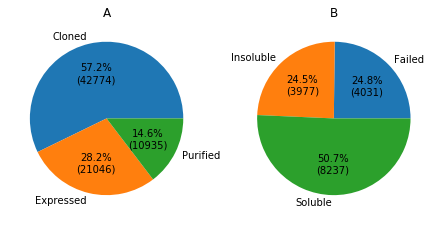

In [112]:

all_data = ['42774 Cloned', '21046 Expressed', '10936 Purified']
all_data_ = ['4032 Failed', '3978 Expressed_(Not_soluble)', '8238 Expressed_(soluble)']

data = [float(x.split()[0]) for x in all_data]
labels = ['Cloned', 'Expressed', 'Purified']

data_ = [float(x.split()[0]) for x in all_data_]
labels_ = ['Failed', 'Insoluble', 'Soluble'] #Protein expressed:Tested_not_found, #ProteinExpressed:Protein_Confirmed SolubleProtein:Tested_Not_Soluble 

# Class 2
# ProteinPurified:
#  Not_Tested
# ProteinExpressed:
#  Protein_Confirmed
# SolubleProtein:
#  Protein_Soluble 

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4), constrained_layout=True)


axes[0].pie(data, labels=labels, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"))
axes[0].set_title("A")


axes[1].pie(data_, labels=labels_, autopct=lambda pct: func(pct, data_),
                                  textprops=dict(color="black"))
axes[1].set_title("B")


plt.savefig("figs/Status_of_protein_expression(1).pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

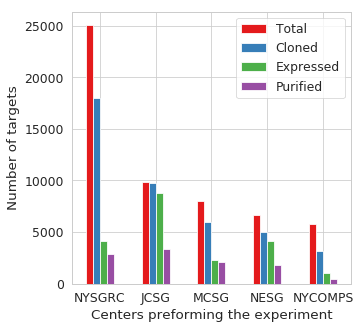

In [3]:
plot_df = tt[['Center', 'Total', 'Cloned', 'Expressed', 'Purified']].\
    sort_values(by="Total", ascending=False).reset_index(drop=True)
ax = plot_df[:5].plot(kind='bar', figsize=(5, 5))
ax.set_xticklabels(rotation = (0), \
                    labels=plot_df['Center'].values[:5])
ax.set_xlabel('Centers preforming the experiment')
ax.set_ylabel('Number of targets')
plt.savefig("figs/Status_of_protein_expression.pdf", bbox_inches = 'tight', pad_inches = 0)